> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset is focused around IMBD's movie data, showing the popularity of the films, their budgets and release dates.  The goal of the analysis is to come to specific conclusions on whether specific data coorelates with one another.  The analysis we will be leveraging today will look at the following variables:
    
    1. Release_Date
    2. Genres
    3. Popularity
    4. Budget_adj
    5. Release_Year
    
> In this report we will be asking the following questions:
    1. Is there a comparison between Budget of a film and the Popularity of a film?
    2. What Genres are most prevelant year to year, what are the trends of these genres over the years?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning (Replace this with more specific notes!)

In [4]:
#Checking if there are any null values in the dataset
df.isna().sum();

In [5]:
#dropping all nulls in the dataset
df.dropna(inplace=True)

In [6]:
#checking if nulls were dropped from the dataset
df.isna().sum() == 0

id                      True
imdb_id                 True
popularity              True
budget                  True
revenue                 True
original_title          True
cast                    True
homepage                True
director                True
tagline                 True
keywords                True
overview                True
runtime                 True
genres                  True
production_companies    True
release_date            True
vote_count              True
vote_average            True
release_year            True
budget_adj              True
revenue_adj             True
dtype: bool

In [7]:
#drops columns that aren't needed for conclusions
drop_columns = ['cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies']

df.drop(drop_columns, axis=1, inplace=True)

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [8]:
#creates new column that gives me the year instead of exact date a film was released
df['release_year'] = pd.DatetimeIndex(df['release_date']).year
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Compare the coorelation between Budget of a film and the Popularity of a film

In [9]:
#show the average popularity of a movie as we are going to compare budgets vs. popularity
df['popularity'].mean()

1.3167630110441788

In [22]:
#changes dtype to show actual numbers (we use budget_adj as it's a more modern look at what budgets would be based on inflation)
df['budget_adj'] = df['budget_adj'].astype(int)

In [32]:
#Checking to see how many Zero's are in the data
sum(df['budget_adj']==0)

547

In [37]:
#replacing the films with no budget information with the mean of the collective films budgets
df['budget_adj'] = df['budget_adj'].replace(0, df['budget_adj'].mean())

In [38]:
#checking to see if there are any budgets with no information
sum(df['budget_adj']==0)

0

In [40]:
#Checking for percentiles of budget_adj to create bins
df['budget_adj'].describe().astype(int)

count         1992
mean      46234474
std       46590856
min              1
25%       18365083
50%       36273759
75%       50644500
max      425000000
Name: budget_adj, dtype: int32

In [64]:
#create bin edges to show was is a low budget, moderate budget and strong budget
bin_edges = [18365083, 36273759, 50644500,425000000]

In [65]:
#Creating the labels for what will be identifiers for the bins
bin_labels = ['Low Budget', 'Moderate Budget', 'Strong Budget']

In [66]:
#Creating Budget Ranking column
df['budget_rank'] = pd.cut(df['budget_adj'], bin_edges, labels=bin_labels)

In [67]:
#Finding the average of each bin label (budget vs. popularity)
df.groupby(['budget_rank'])['popularity'].mean()

budget_rank
Low Budget         1.306040
Moderate Budget    0.732794
Strong Budget      2.636743
Name: popularity, dtype: float64

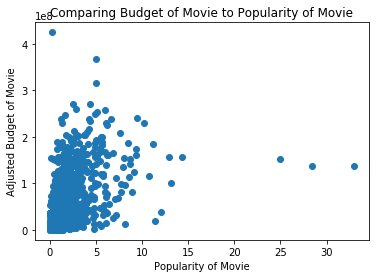

In [72]:
#Plot the findings
bud = df['budget_adj']
pop= df['popularity']
plt.scatter(x=pop, y=bud);

plt.xlabel('Popularity of Movie')
plt.ylabel('Adjusted Budget of Movie')
plt.title('Comparing Budget of Movie to Popularity of Movie');

# Visualization Analysis

>I wanted to compare if the budgets being invested into a film at any impact on the popularity of the film.  Meaning if you put more money into a film would people enjoy it more than if you don't.  Through the visualization you can see that as popuarlity increases so does the budget of a film

### Which Genres are most popular year to year

In [16]:
#used this to shorten the output but you can use df['genres'].unique() to see all the outputs and find each unique value
format_genres = df['genres'].apply(lambda x: pd.Series(str(x).split("|")))
format_genres

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,NaN
1,Action,Adventure,Science Fiction,Thriller,NaN
2,Adventure,Science Fiction,Thriller,NaN,NaN
3,Action,Adventure,Science Fiction,Fantasy,NaN
4,Action,Crime,Thriller,NaN,NaN
...,...,...,...,...,...
10724,Adventure,Action,Thriller,NaN,NaN
10759,Horror,Thriller,NaN,NaN,NaN
10760,Comedy,NaN,NaN,NaN,NaN
10817,Documentary,Music,NaN,NaN,NaN


In [17]:
#seperate values individually by column to append to one column
df1 = format_genres[0]
df2 = format_genres[1]
df3 = format_genres[2]
df4 = format_genres[3]
df5 = format_genres[4]

In [18]:
#append each index to one column
df4 = df4.append(df5)
df3 = df3.append(df4)
df2 = df2.append(df3)
df1 = df1.append(df2)

In [19]:
#find all unique values to compare below
df1.unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'War', 'Mystery', 'Fantasy',
       'Thriller', 'Romance', 'Horror', 'History', 'Documentary',
       'Animation', 'Music', 'TV Movie', nan, 'Foreign'], dtype=object)

In [20]:
#store all unique values in their own array
seperate_genres = ['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'War', 'Mystery', 'Fantasy',
       'Thriller', 'Romance', 'Horror', 'History', 'Documentary',
       'Animation', 'Music', 'TV Movie', 'Foreign']

In [21]:
#See the frequency in which films are created with a specific genre
def genre_analysis():
    for c in seperate_genres:
        df1 = df['genres'].str.contains(c).fillna(False)
        data = df[df1].count()[0]
        print(c, "=", data)
genre_analysis()

Action = 532
Adventure = 361
Western = 20
Science Fiction = 291
Drama = 838
Family = 233
Comedy = 640
Crime = 262
War = 44
Mystery = 148
Fantasy = 202
Thriller = 575
Romance = 291
Horror = 273
History = 56
Documentary = 93
Animation = 170
Music = 72
TV Movie = 16
Foreign = 6


C:\Users\coryt\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\Users\coryt\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
C:\Users\coryt\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, se

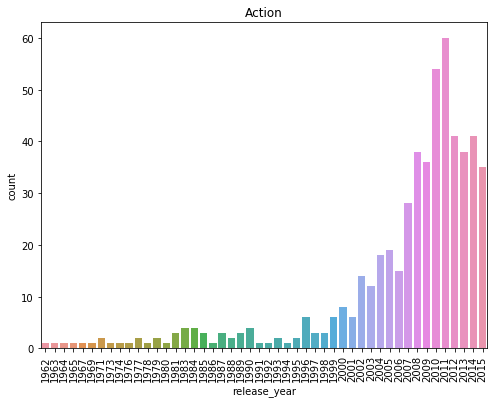

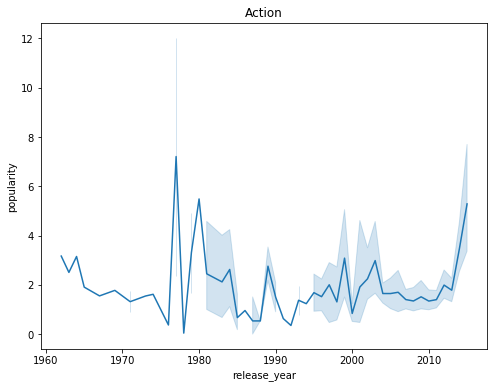

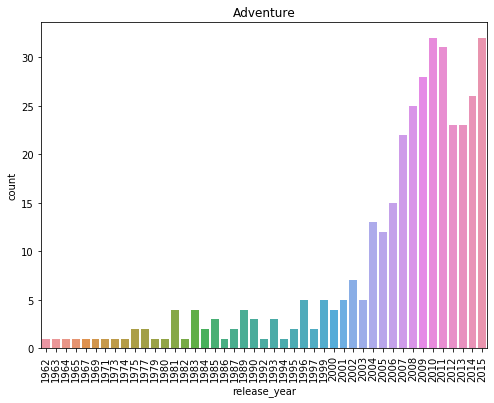

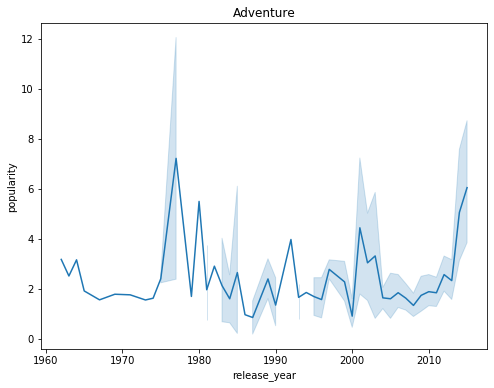

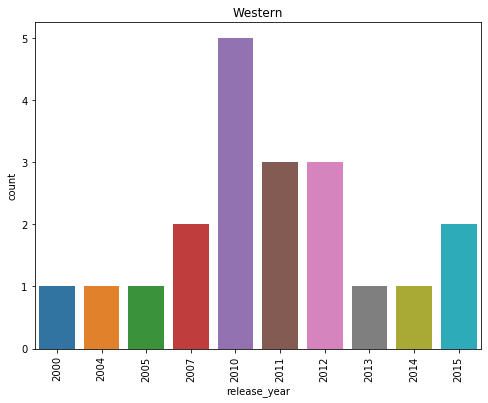

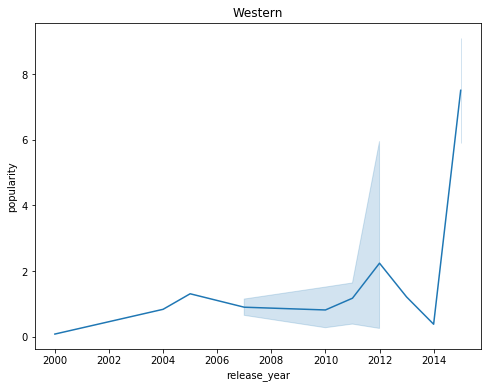

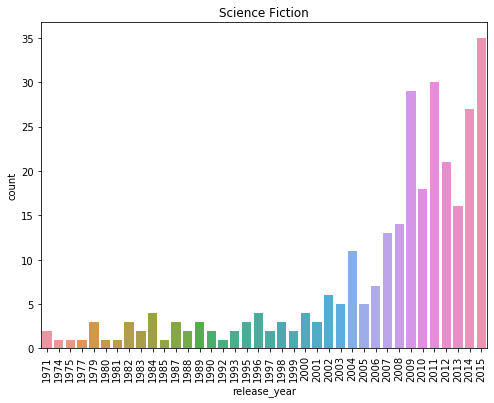

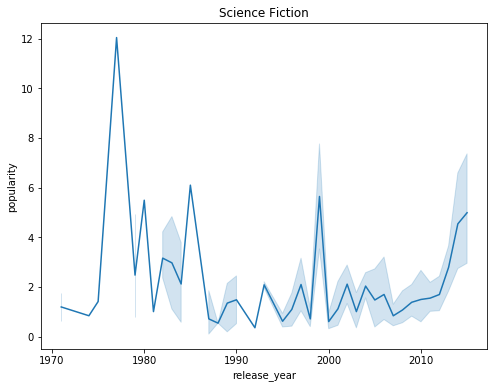

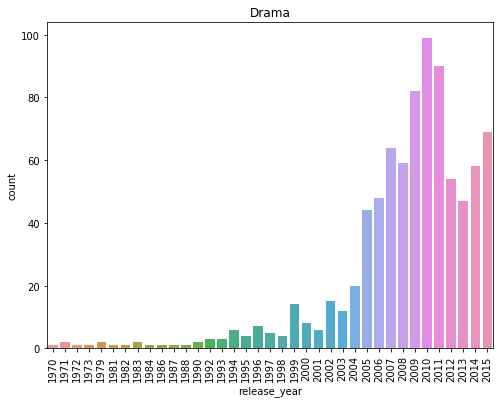

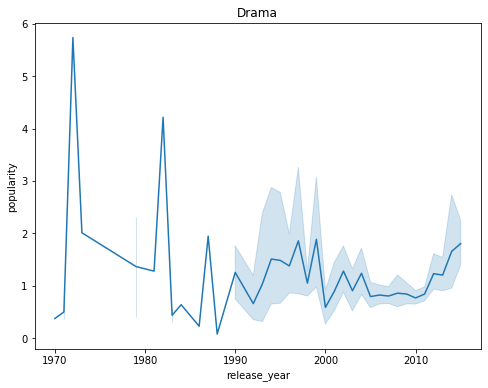

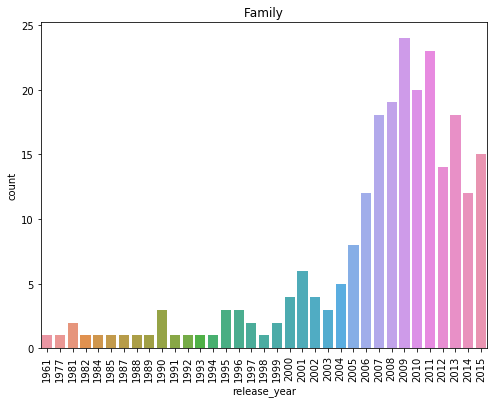

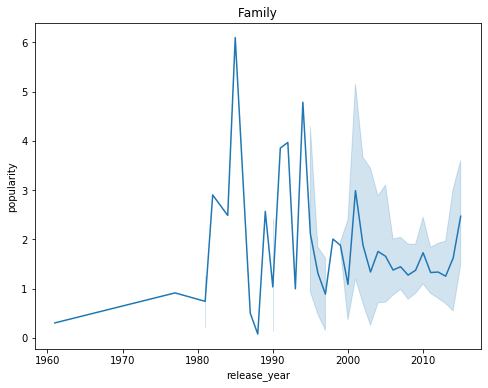

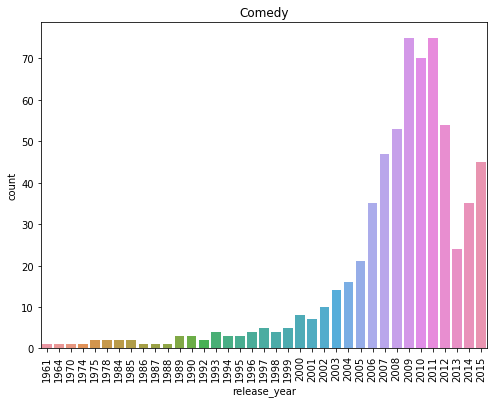

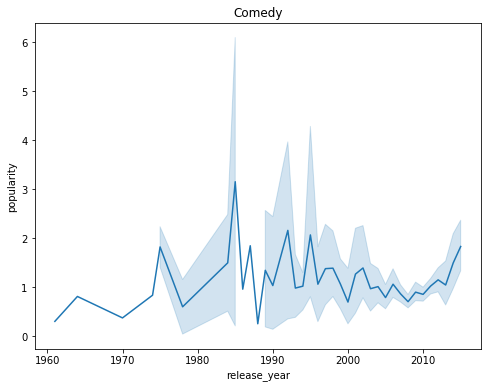

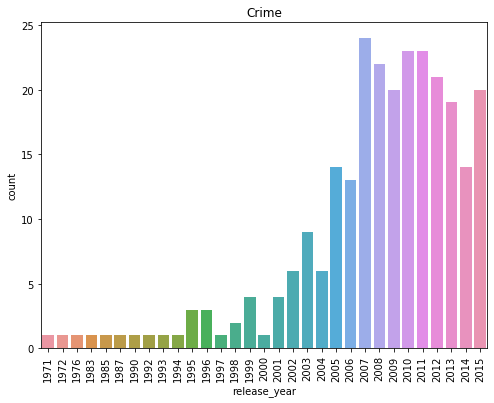

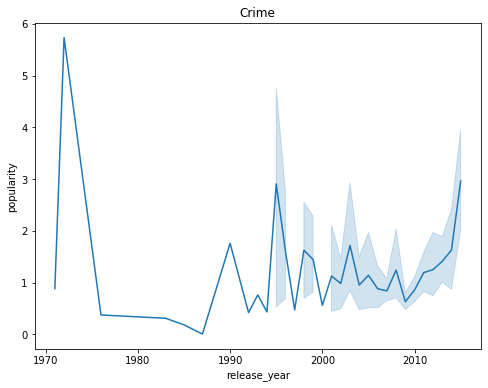

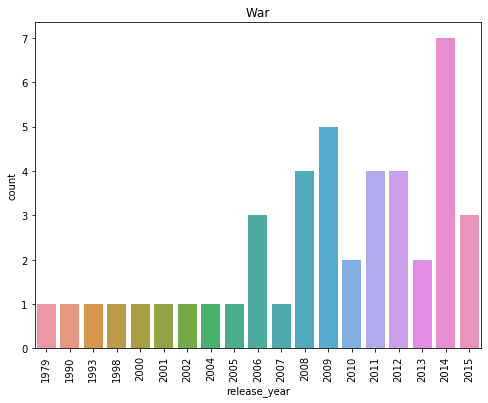

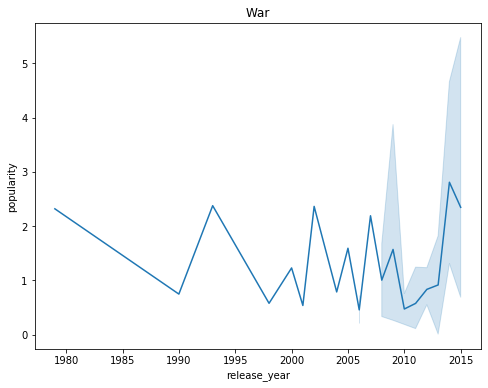

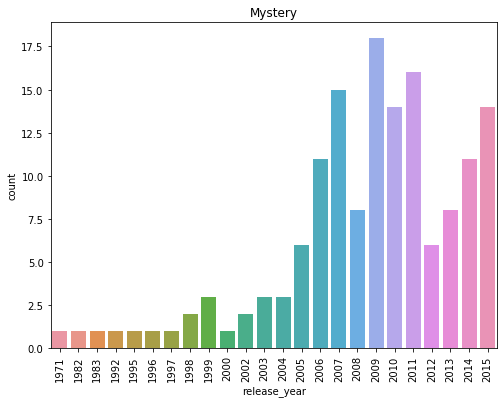

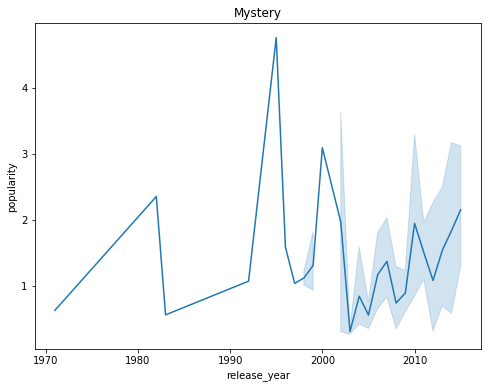

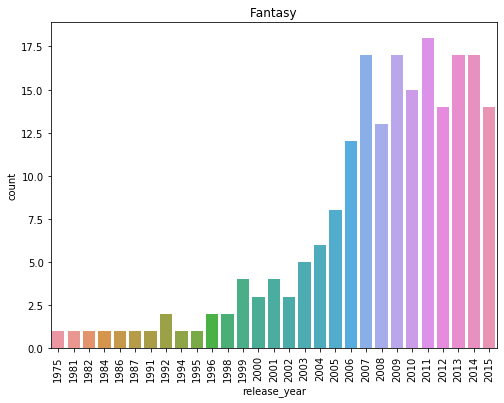

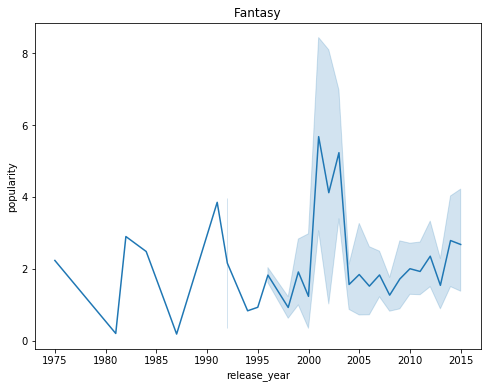

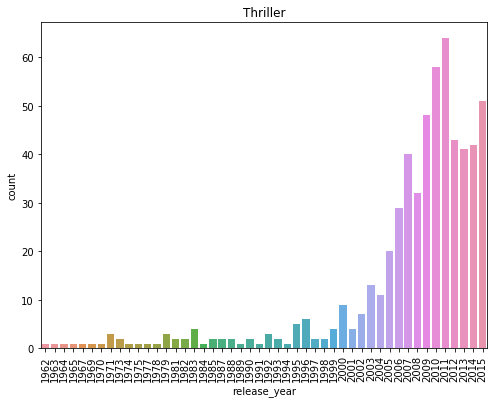

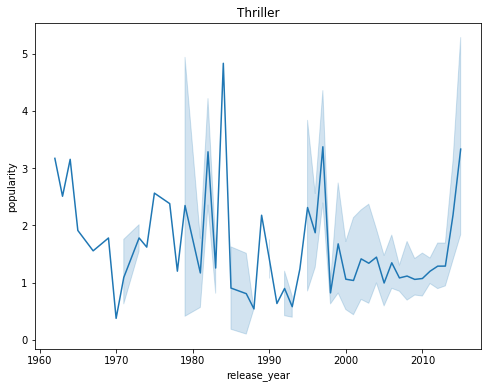

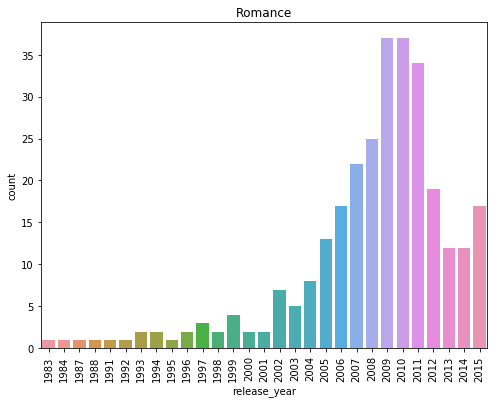

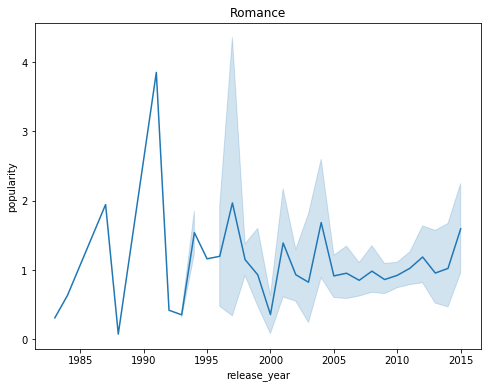

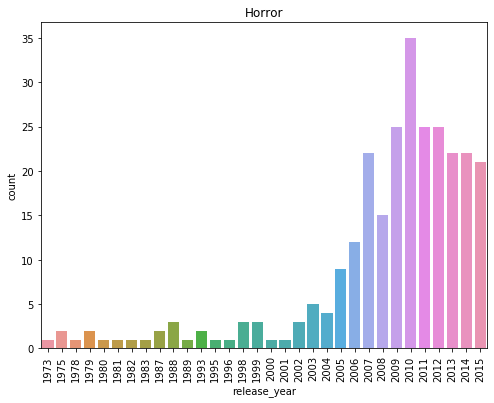

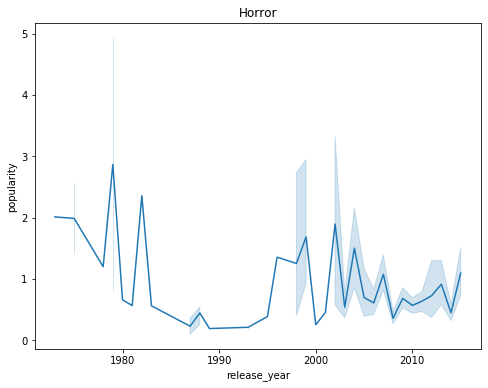

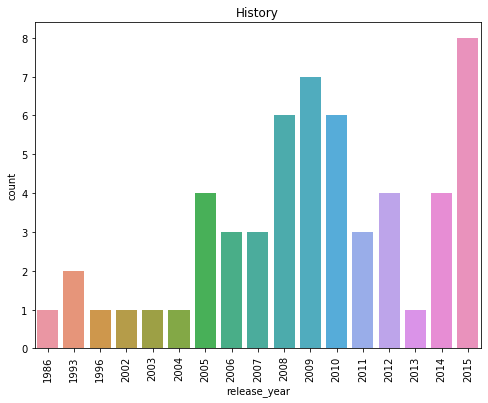

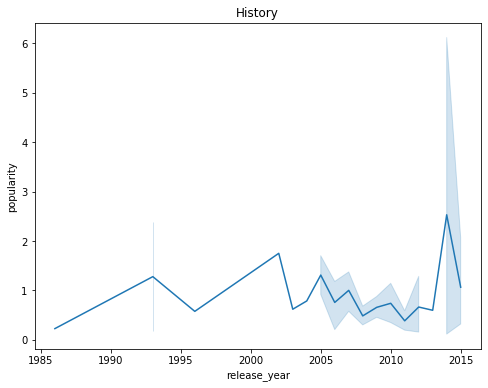

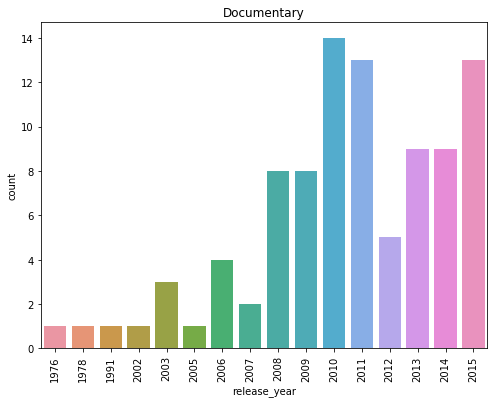

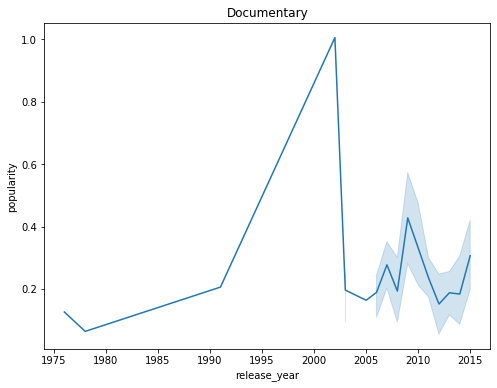

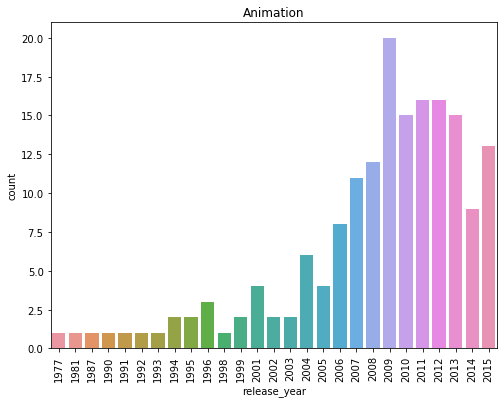

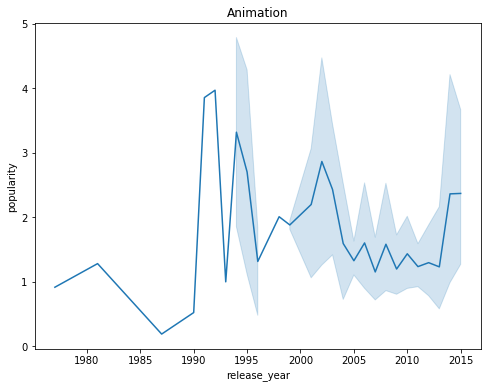

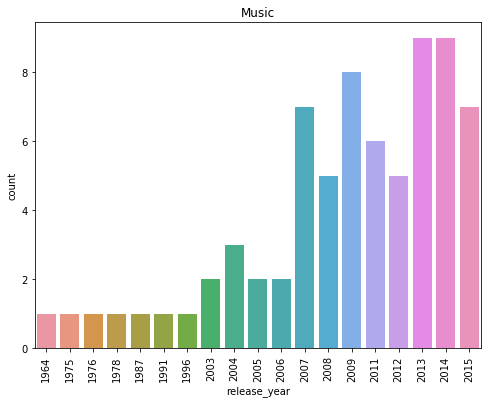

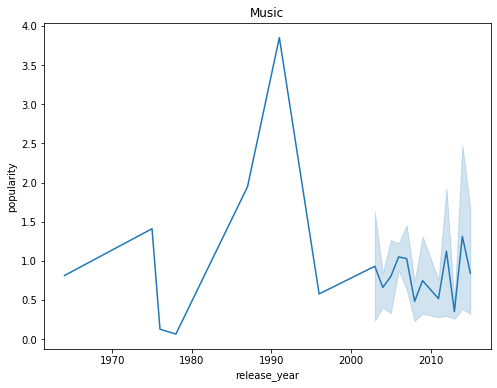

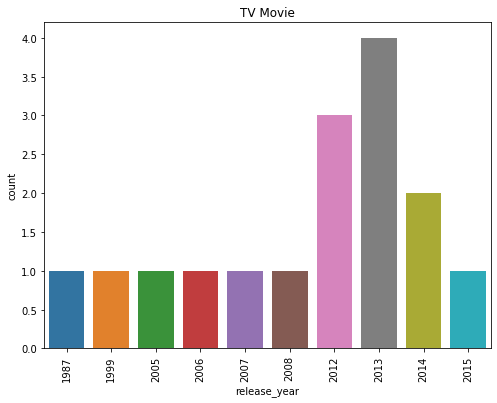

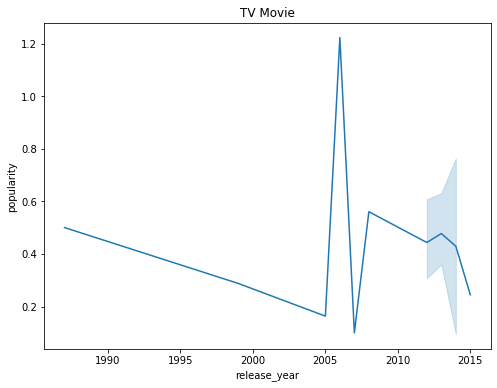

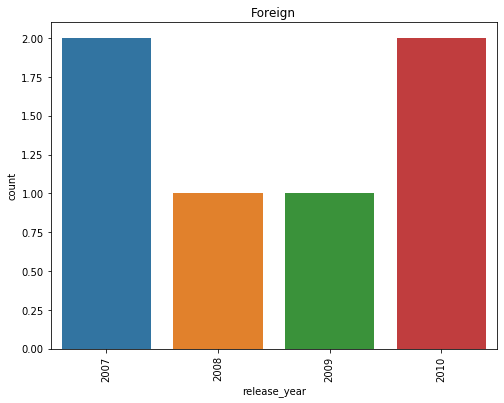

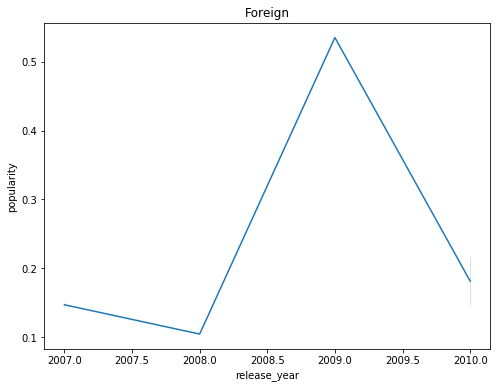

In [22]:
#visualize the frequency of genres over varying release years and popularity based on release_year
def visual():
    for c in seperate_genres:
        df1 = df['genres'].str.contains(c).fillna(False)
        f, ax = plt.subplots(figsize=(8, 6))
        sns.countplot(x='release_year', data=df[df1])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.title(c)
        #shows the comparison of popularity vs. release_year over time
        compare_movies =['popularity']
        for x in compare_movies:
            f, ax = plt.subplots(figsize=(8,6))
            sns.lineplot(x='release_year',y=x,data=df[df1])
            plt.title(c)
visual()

# Visualization Analysis
>In this visualization I wanted to show to comparisons of the data. 
    >1. The frequency of Genres over varying rlease years
    >2. The Popularity based on the release year of each genre.

>For the most part the frequency increased for movie development in each genre from start to end.  There could be many reasons for this, as movie development has become a bigger and more profitable industry that years past.

>The Populularity based on the release year was used to see at what time frame was a genre the most popular.  You can see that at different years popularity for specific Genres were very high and then it would subside.  There are still questions to this that would help this analysis, such as cultural norms, and were the subistidtions due to and saturation of those films in the market?

<a id='conclusions'></a>
## Conclusions

> Based on the analysis, there is a positive coorleation between the amount of money put into a movie (budget), and it's popularity.  This makes sense based on bigger studios putting more effects and higher known actors into their movies.  There is a uniform growth of the amount of movies (genres) released in a specific time frame.  Each genre (for the most part) was seen with an increase in production films as time went on.  What's interesting is that when we compare the year of release and the popularity of the movie, you can see there are specific time frames when genres were very popular and other times when they are not.  Moving forward we may want to leverage outside data such as cultural norms and interests of the population to see if these impact this finding.

>There were some limitations with this analysis however:
> 1. We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.
> 2. There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
> 3. Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.
